# Pulsar Emission Data Analysis

In [182]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [183]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [184]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar1 = pd.read_csv("Data/J0437-4715.pulses", sep = ' ', header = None, names = colnames)
pulsar2 = pd.read_csv("Data/J0835-4510.pulses", sep = ' ', header = None, names = colnames)
pulsar3 = pd.read_csv("Data/J0953+0755.pulses", sep = ' ', header = None, names = colnames)
pulsar4 = pd.read_csv("Data/J1243-6423.pulses", sep = ' ', header = None, names = colnames)
pulsar5 = pd.read_csv("Data/J1456-6843.pulses", sep = ' ', header = None, names = colnames)
pulsar6 = pd.read_csv("Data/J1644-4559.pulses", sep = ' ', header = None, names = colnames)

In [185]:
median = pulsar1["Brightness"].median()
print("Median: ", median)
pulsar1['Binary'] = np.where(pulsar1['Brightness'] > median, 1, 0)

median = pulsar2["Brightness"].median()
print("Median: ", median)
pulsar2['Binary'] = np.where(pulsar2['Brightness'] > median, 1, 0)

median = pulsar3["Brightness"].median()
print("Median: ", median)
pulsar3['Binary'] = np.where(pulsar3['Brightness'] > median, 1, 0)

median = pulsar4["Brightness"].median()
print("Median: ", median)
pulsar4['Binary'] = np.where(pulsar4['Brightness'] > median, 1, 0)

median = pulsar5["Brightness"].median()
print("Median: ", median)
pulsar5['Binary'] = np.where(pulsar5['Brightness'] > median, 1, 0)

median = pulsar6["Brightness"].median()
print("Median: ", median)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > median, 1, 0)

Median:  0.42381595
Median:  2.255182
Median:  0.4818942
Median:  0.07665979
Median:  0.081228
Median:  0.65829515


In [186]:
pulsar1.head(10)

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.598393,0.056431,1
1,2,0.590859,0.055182,1
2,3,0.449643,0.063632,1
3,4,0.682860,0.056269,1
4,5,0.490026,0.046830,1
5,6,0.586071,0.052649,1
6,7,0.150353,0.056483,0
7,8,0.384684,0.052567,0
8,9,0.429094,0.055569,1
9,10,0.995865,0.075811,1


In [187]:
pulsar2.head(10)

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.984043,0.053831,0
1,2,2.487928,0.048796,1
2,3,1.690295,0.025639,0
3,4,1.196142,0.039539,0
4,5,1.979783,0.041460,0
5,6,2.297645,0.054210,1
6,7,2.322135,0.043554,1
7,8,2.289047,0.049957,1
8,9,2.442574,0.025110,1
9,10,2.136332,0.022712,0


In [188]:
pulsar3.head(10)

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.334330,0.015570,0
1,2,-0.098659,0.014051,0
2,3,0.123514,0.011901,0
3,4,0.443923,0.014365,0
4,5,1.590446,0.057785,1
5,6,1.233848,0.018692,1
6,7,0.857876,0.022208,1
7,8,0.254255,0.018185,0
8,9,0.292077,0.021672,0
9,10,0.439929,0.046293,0


In [189]:
pulsar4.head(10)

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.101127,0.001893,1
1,2,0.012166,0.001814,0
2,3,0.021918,0.001835,0
3,4,0.181179,0.002183,1
4,5,0.000240,0.001725,0
5,6,0.085866,0.001723,1
6,7,0.067280,0.001778,0
7,8,0.092884,0.002438,1
8,9,0.083350,0.002101,1
9,10,0.087871,0.001941,1


In [190]:
pulsar5.head(10)

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.053904,0.005560,0
1,2,0.058653,0.004821,0
2,3,0.110208,0.005196,1
3,4,0.034716,0.004729,0
4,5,0.056101,0.004619,0
5,6,0.046168,0.005074,0
6,7,0.055648,0.004916,0
7,8,0.060890,0.004581,0
8,9,0.024388,0.004922,0
9,10,0.039370,0.004633,0


In [191]:
pulsar6.head(10)

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.634671,0.002761,0
1,2,0.736945,0.005207,1
2,3,0.693834,0.002706,1
3,4,1.021866,0.010184,1
4,5,0.673845,0.006236,1
5,6,0.676883,0.004763,1
6,7,0.527039,0.002422,0
7,8,0.673417,0.003174,1
8,9,0.357076,0.002848,0
9,10,0.661704,0.005588,1


In [192]:
print(pulsar1.shape)
print(pulsar2.shape)
print(pulsar3.shape)
print(pulsar4.shape)
print(pulsar5.shape)
print(pulsar6.shape)

(27000, 4)
(1331, 4)
(14329, 4)
(1819, 4)
(1219, 4)
(698, 4)


In [193]:
pulsar1[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,27000.000000,27000.000000
mean,0.536400,0.062556
std,0.413764,0.056313
min,-5.114133,0.015426
25%,0.296443,0.052381
50%,0.423816,0.056856
75%,0.643723,0.063111
max,18.722410,3.049559


In [194]:
pulsar2[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,1331.000000,1331.000000
mean,2.248107,0.039495
std,0.591161,0.013056
min,0.633413,0.012888
25%,1.825375,0.030223
50%,2.255182,0.037513
75%,2.682259,0.046771
max,4.050718,0.098902


In [195]:
pulsar3[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,14329.000000,14329.000000
mean,0.994458,0.034561
std,1.211127,0.029641
min,-0.219110,0.010120
25%,0.184157,0.014351
50%,0.481894,0.021999
75%,1.337406,0.043380
max,8.552022,0.242041


In [196]:
pulsar4[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,1819.000000,1819.000000
mean,0.075070,0.001958
std,0.057006,0.000306
min,-0.004643,0.001532
25%,0.019738,0.001774
50%,0.076660,0.001872
75%,0.112285,0.002041
max,0.269903,0.005952


In [197]:
pulsar5[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,1219.000000,1219.000000
mean,0.104176,0.005410
std,0.081916,0.001282
min,-0.007285,0.001075
25%,0.045763,0.004728
50%,0.081228,0.004966
75%,0.144228,0.005541
max,0.825366,0.016201


In [198]:
pulsar6[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,698.000000,698.000000
mean,0.654319,0.004445
std,0.163945,0.001855
min,0.007642,0.002129
25%,0.555267,0.003086
50%,0.658295,0.003951
75%,0.753396,0.005349
max,1.159334,0.016097


<AxesSubplot:>

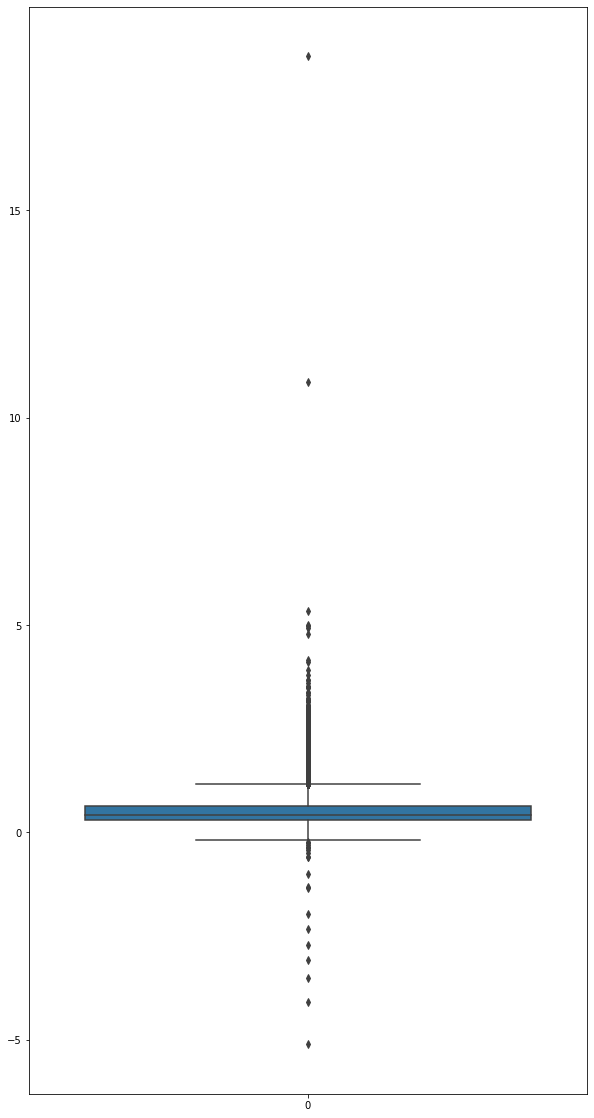

In [199]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar1["Brightness"])

<AxesSubplot:>

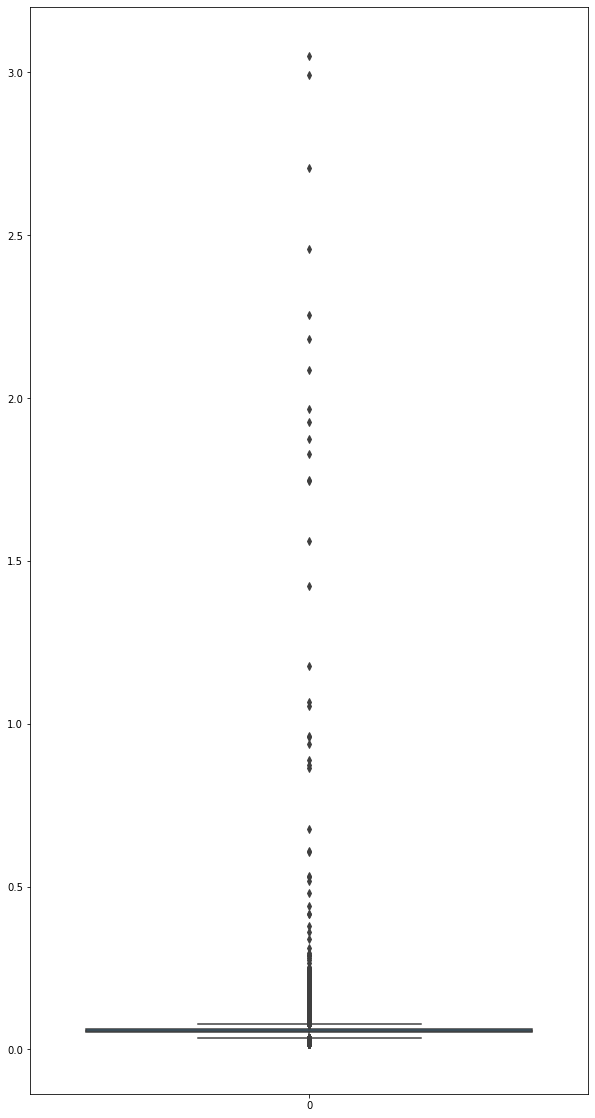

In [200]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar1["Uncertainty"])

<AxesSubplot:>

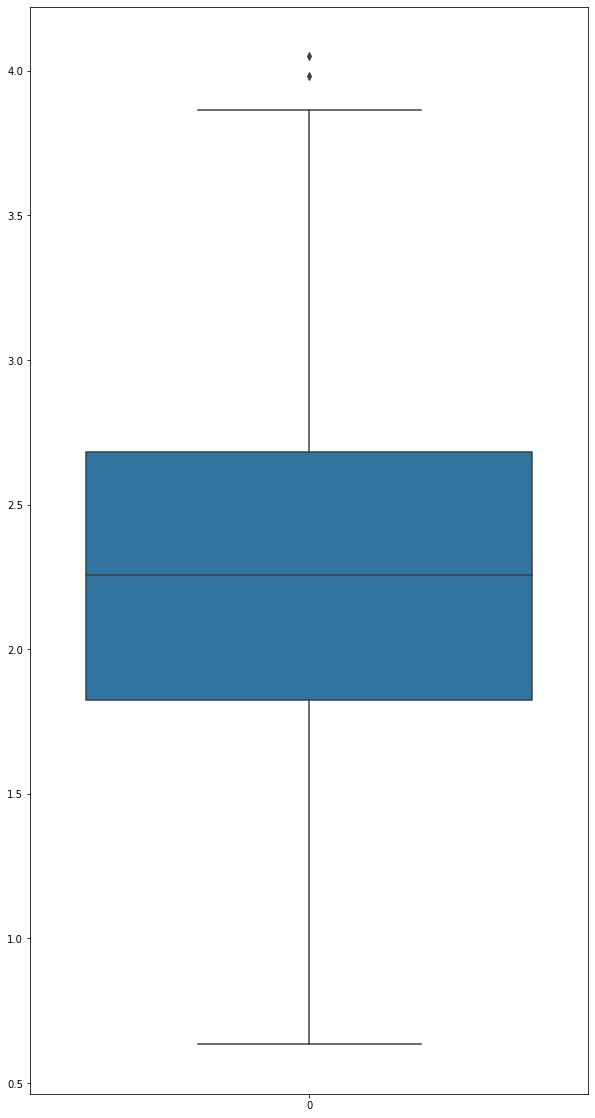

In [201]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar2["Brightness"])

<AxesSubplot:>

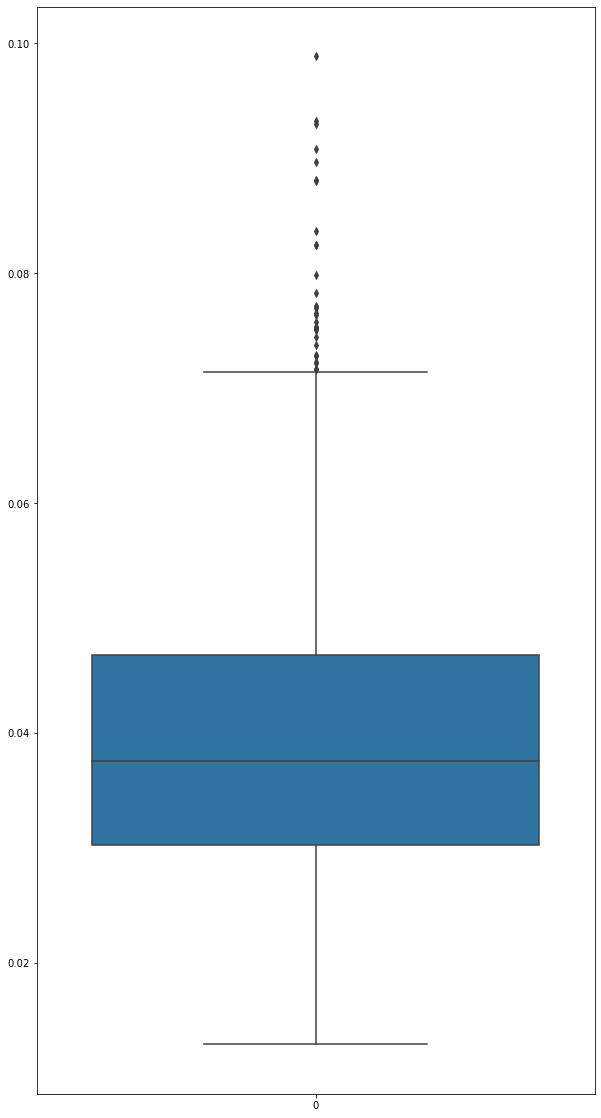

In [202]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar2["Uncertainty"])

<AxesSubplot:>

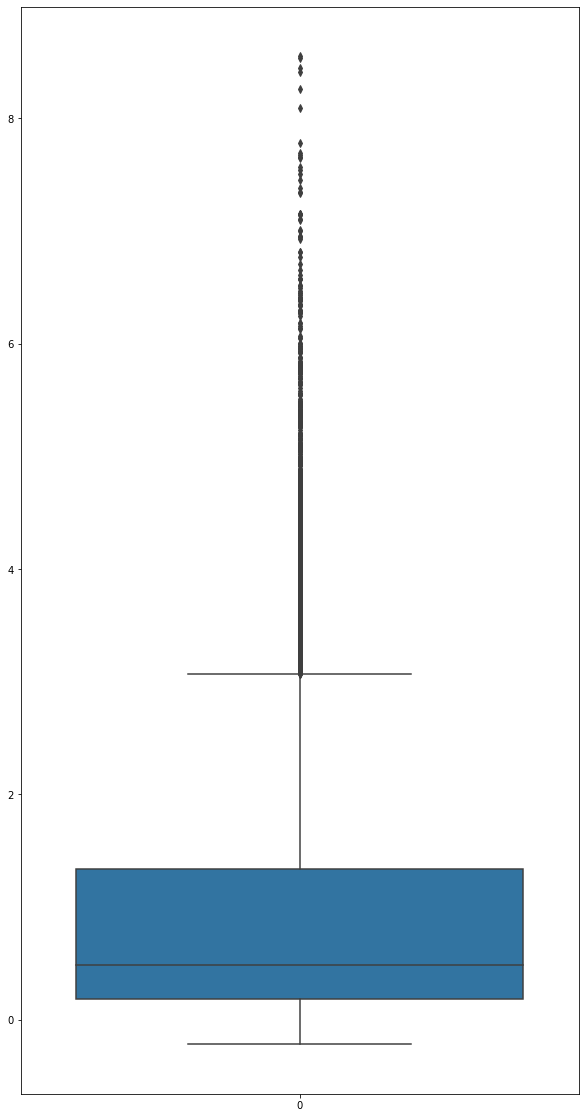

In [203]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar3["Brightness"])

<AxesSubplot:>

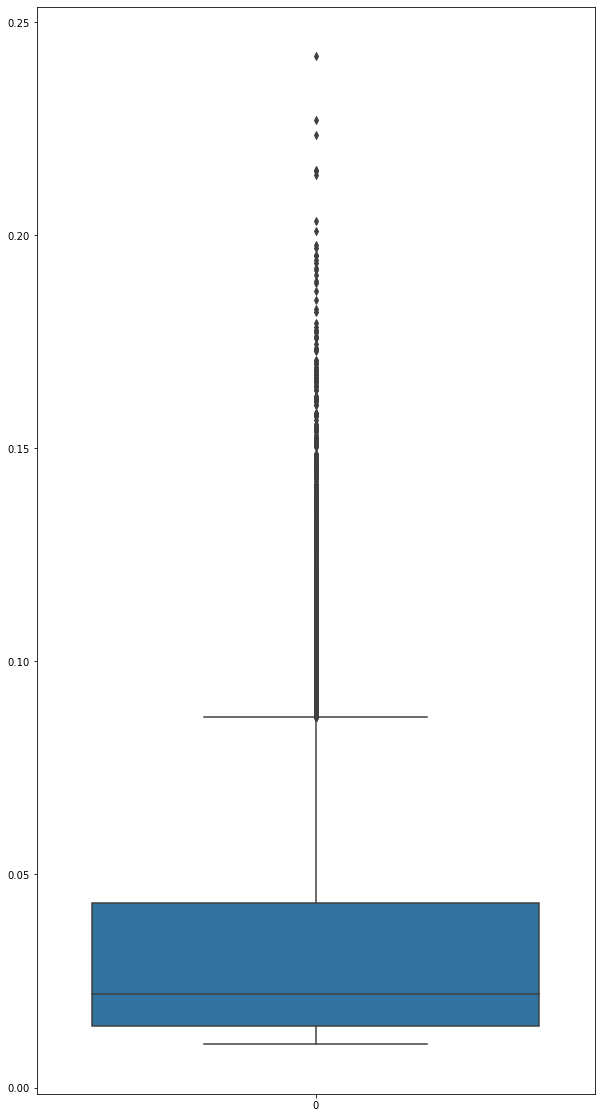

In [204]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar3["Uncertainty"])

<AxesSubplot:>

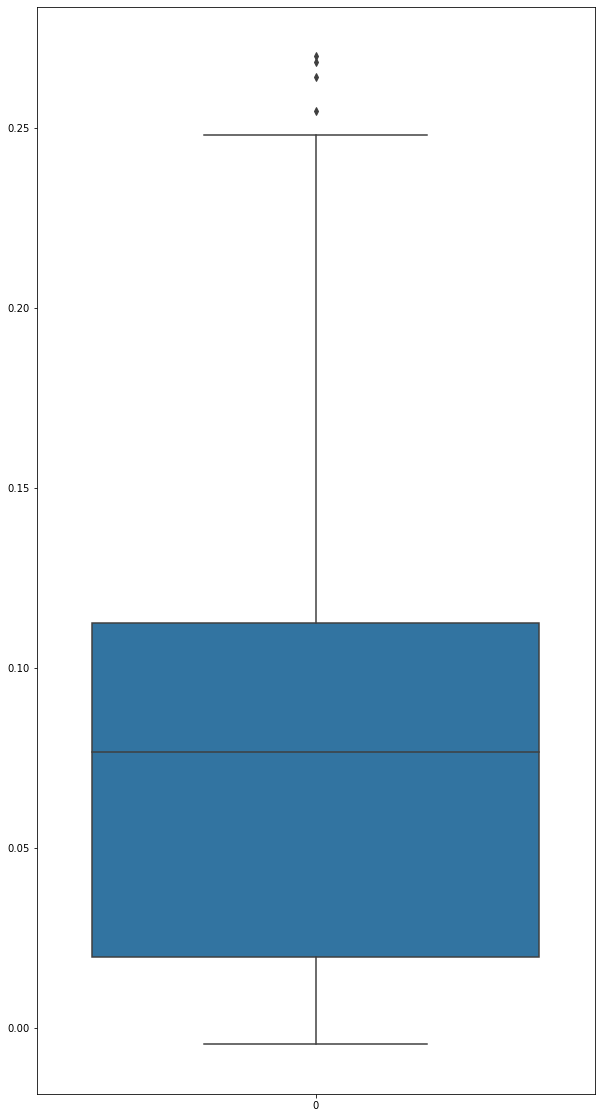

In [205]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar4["Brightness"])

<AxesSubplot:>

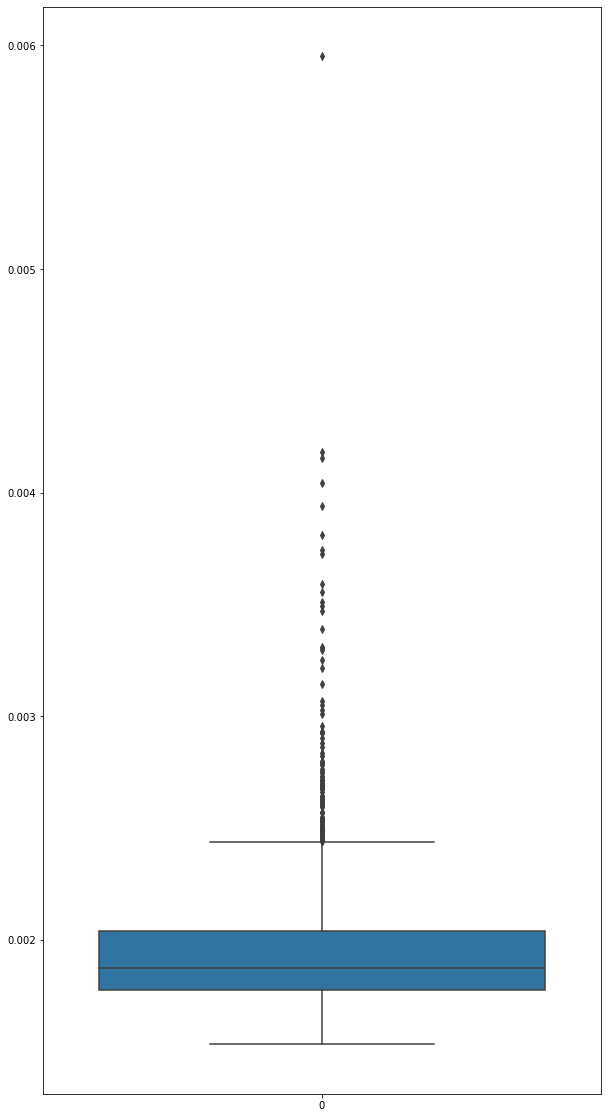

In [206]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar4["Uncertainty"])

<AxesSubplot:>

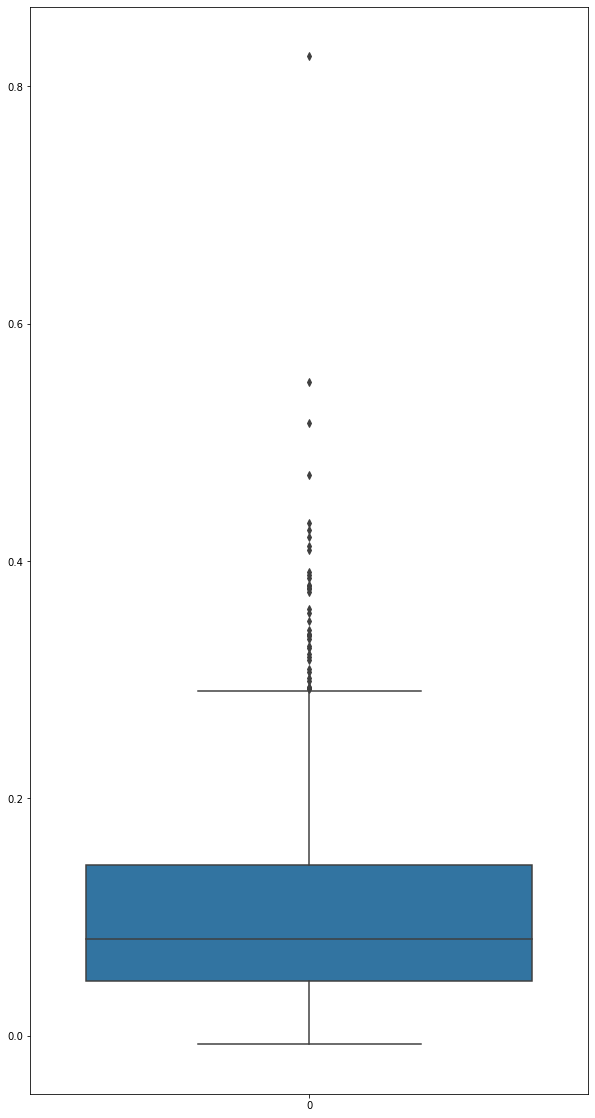

In [207]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar5["Brightness"])

<AxesSubplot:>

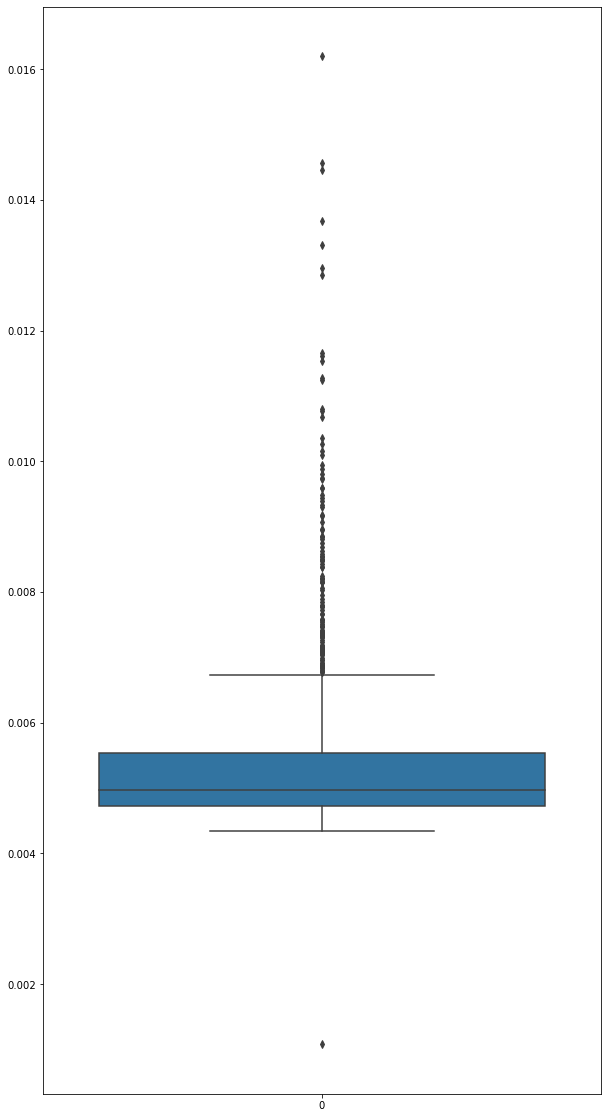

In [208]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar5["Uncertainty"])

<AxesSubplot:>

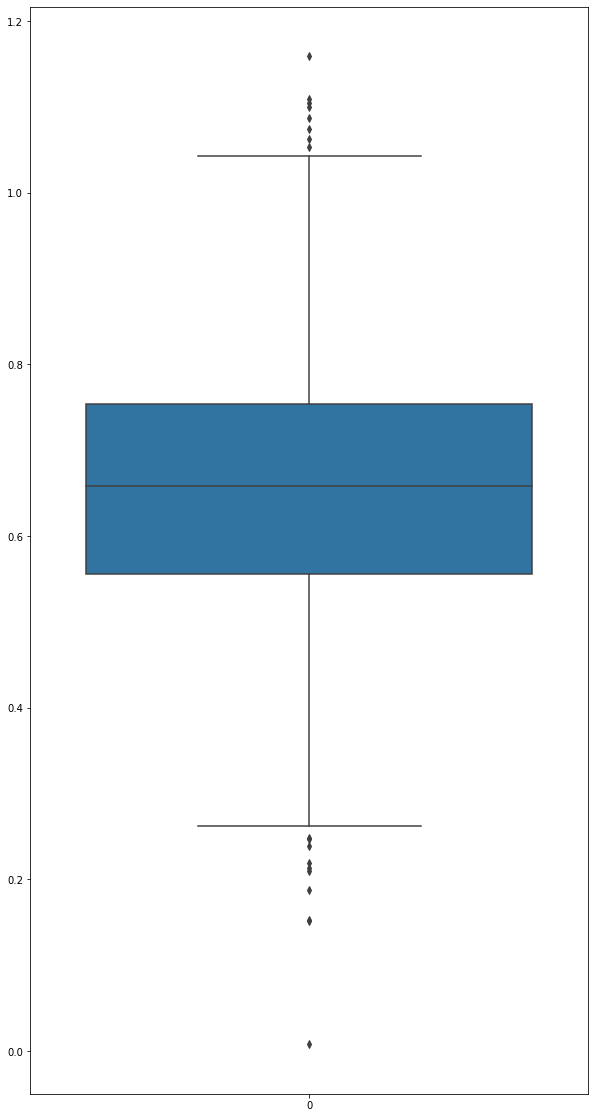

In [209]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar6["Brightness"])

<AxesSubplot:>

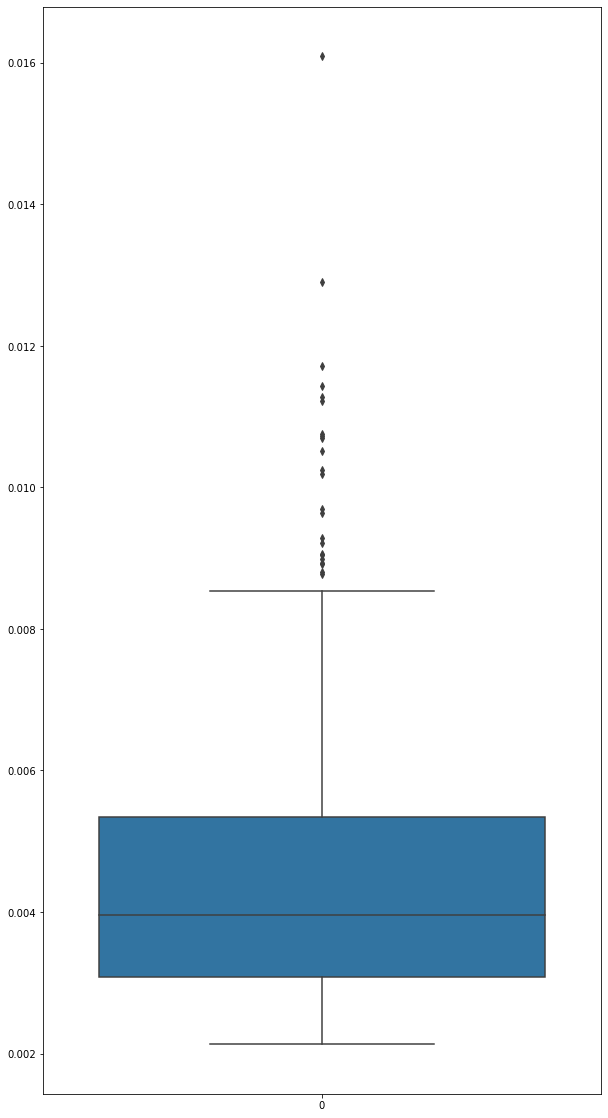

In [210]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar6["Uncertainty"])

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

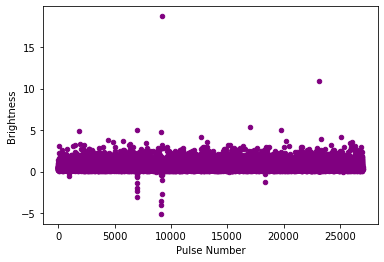

In [211]:
pulsar1.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

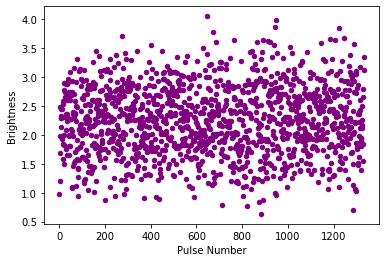

In [212]:
pulsar2.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

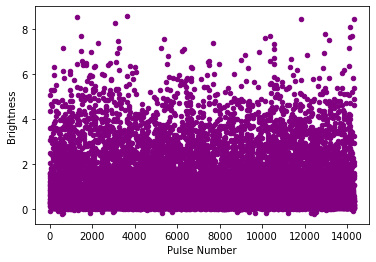

In [213]:
pulsar3.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

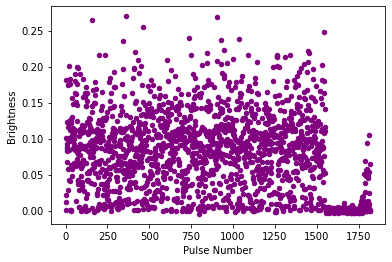

In [214]:
pulsar4.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

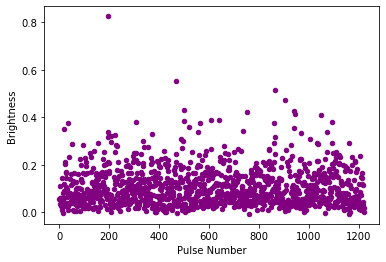

In [215]:
pulsar5.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

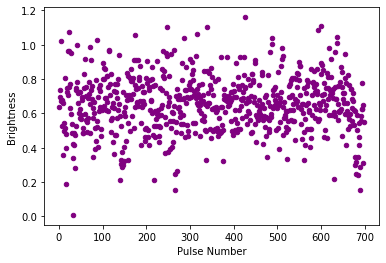

In [216]:
pulsar6.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

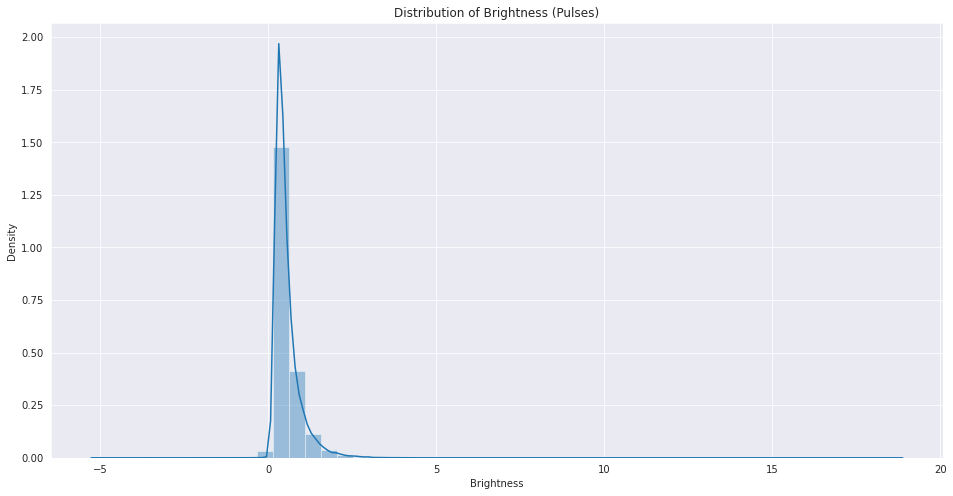

In [217]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar1.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

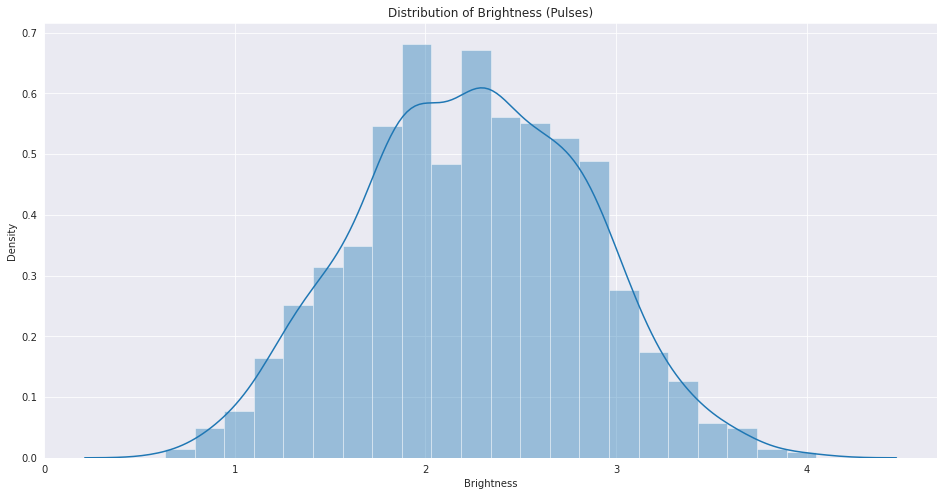

In [218]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar2.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

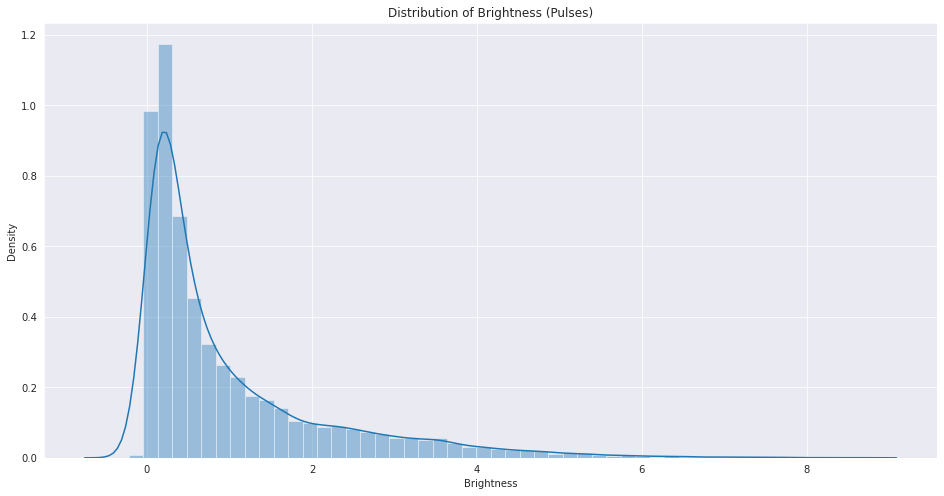

In [219]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar3.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

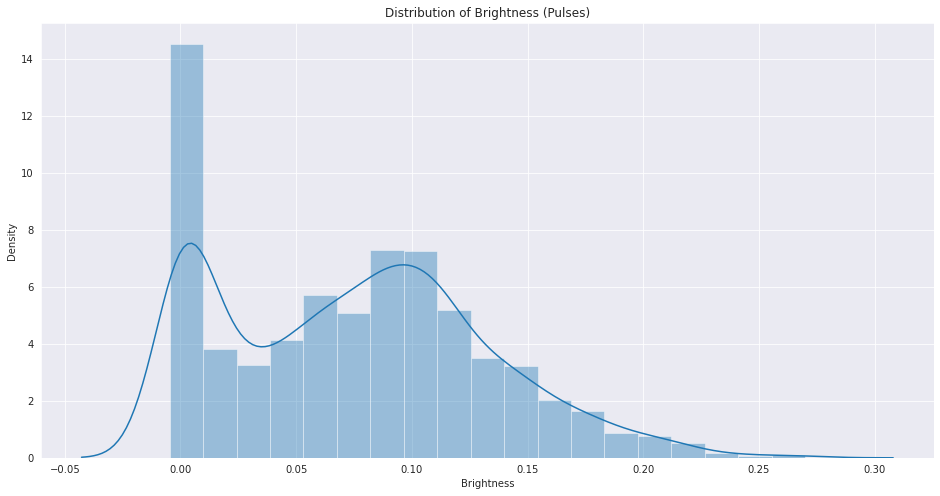

In [220]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar4.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

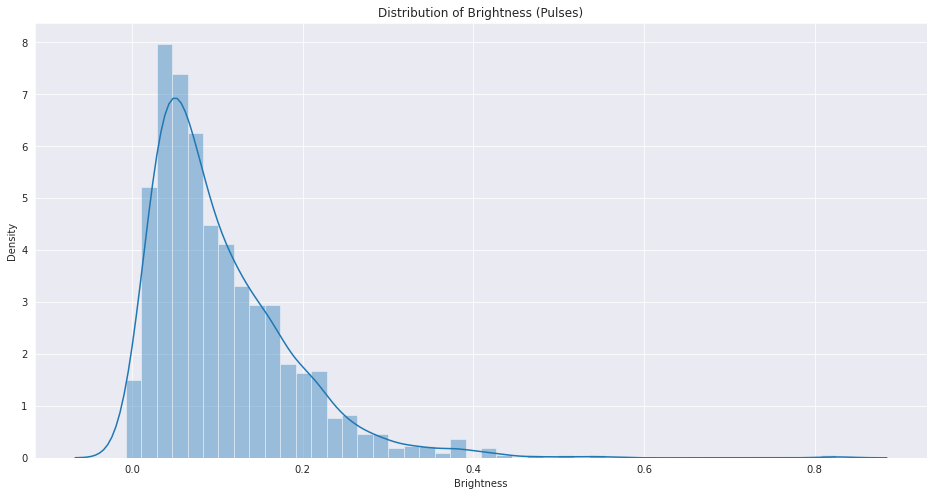

In [221]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar5.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

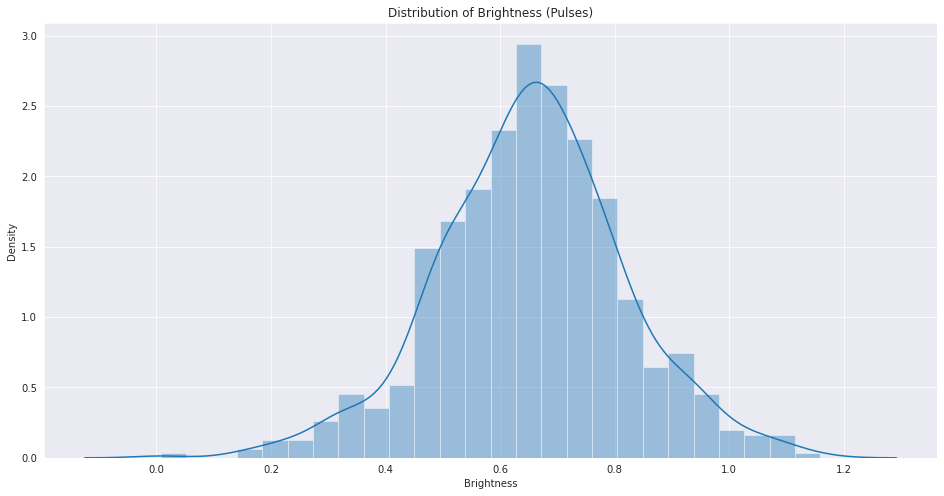

In [222]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

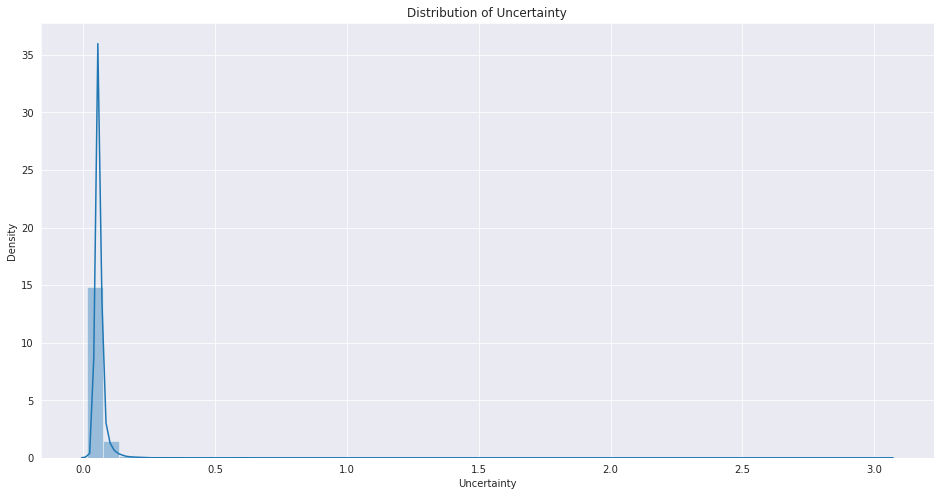

In [223]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar1.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

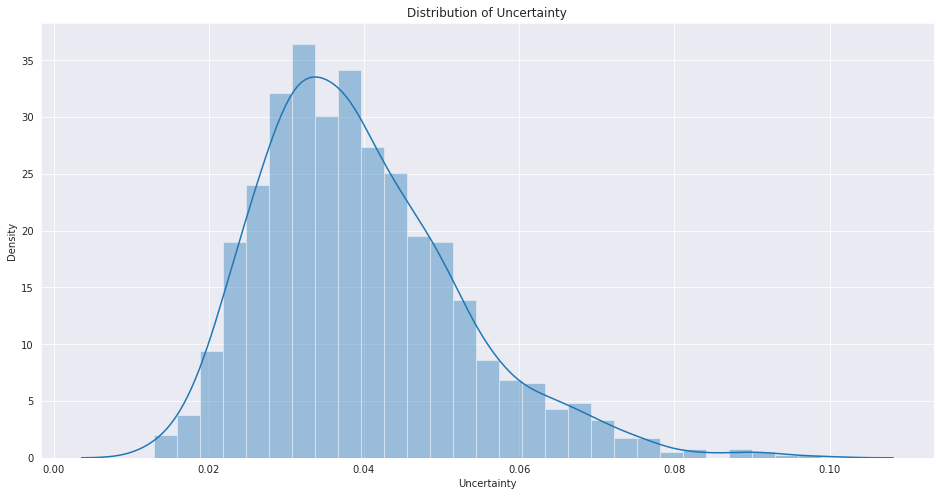

In [224]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar2.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

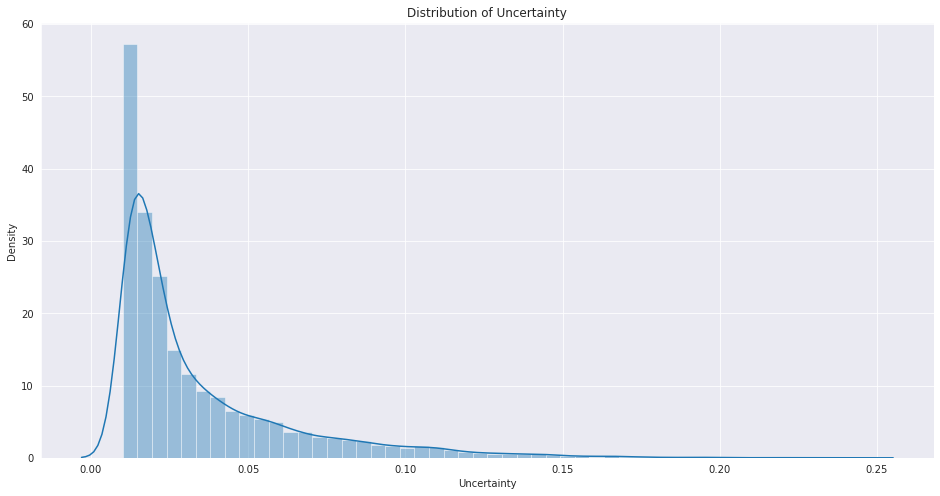

In [225]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar3.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

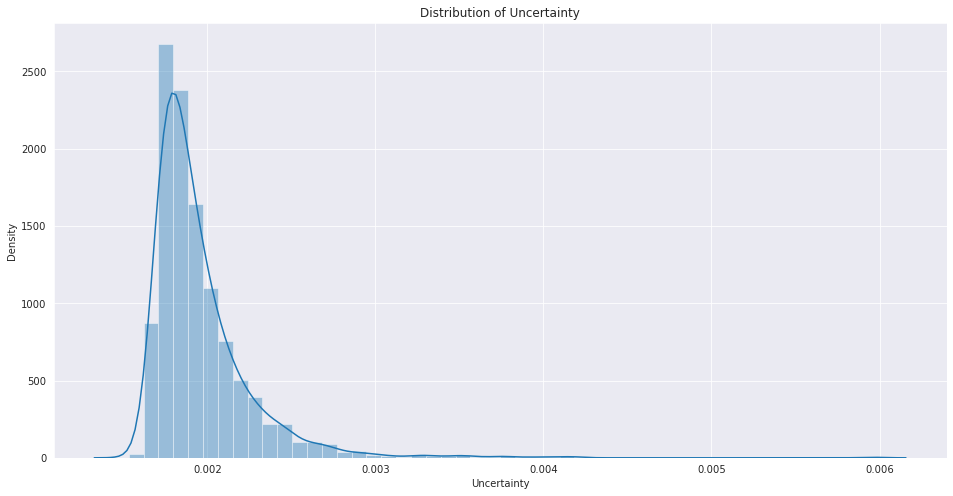

In [226]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar4.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

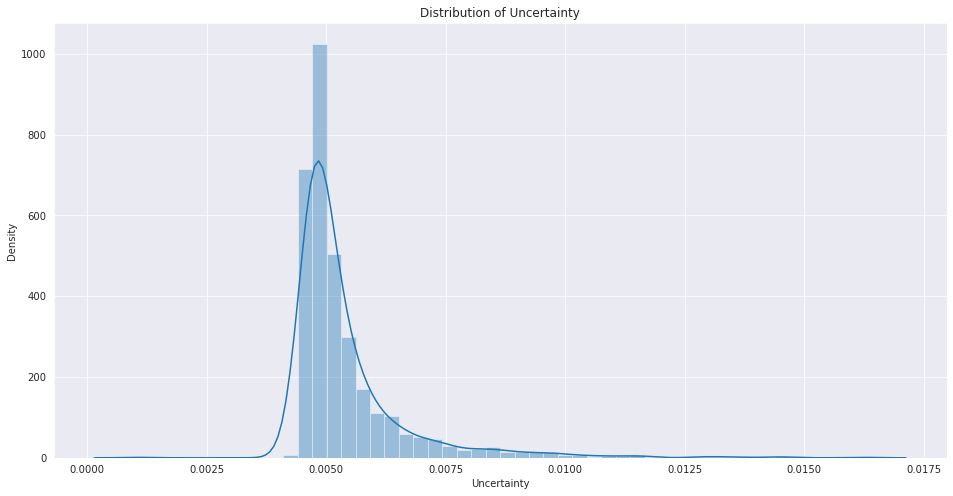

In [227]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar5.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

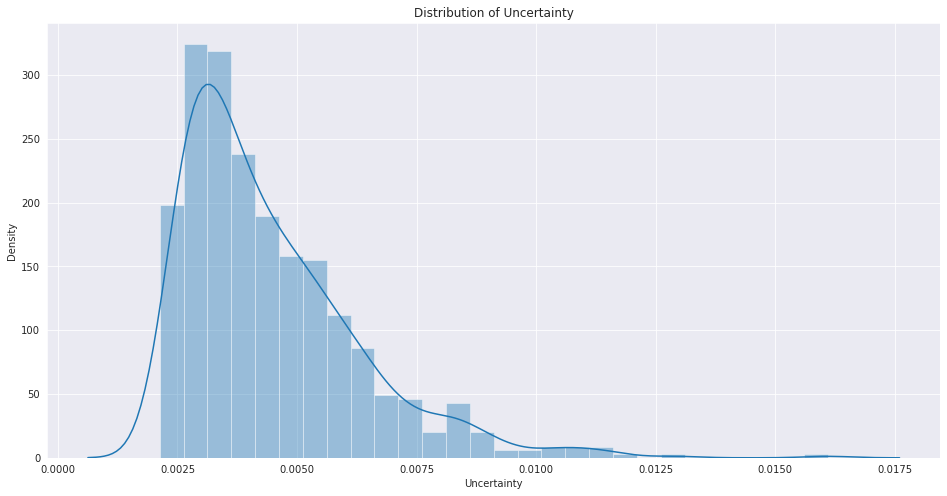

In [228]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Uncertainty)
plt.title("Distribution of Uncertainty")

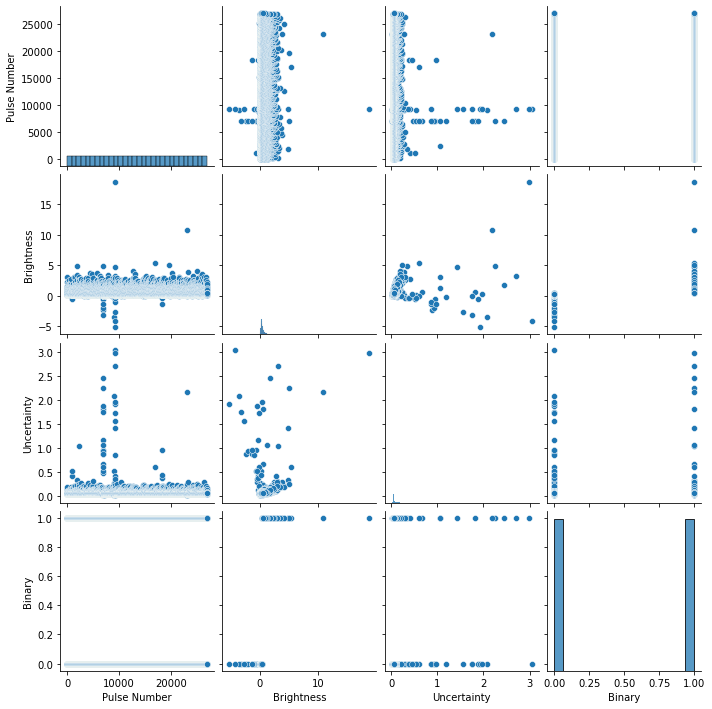

In [229]:
sns.pairplot(pulsar1)

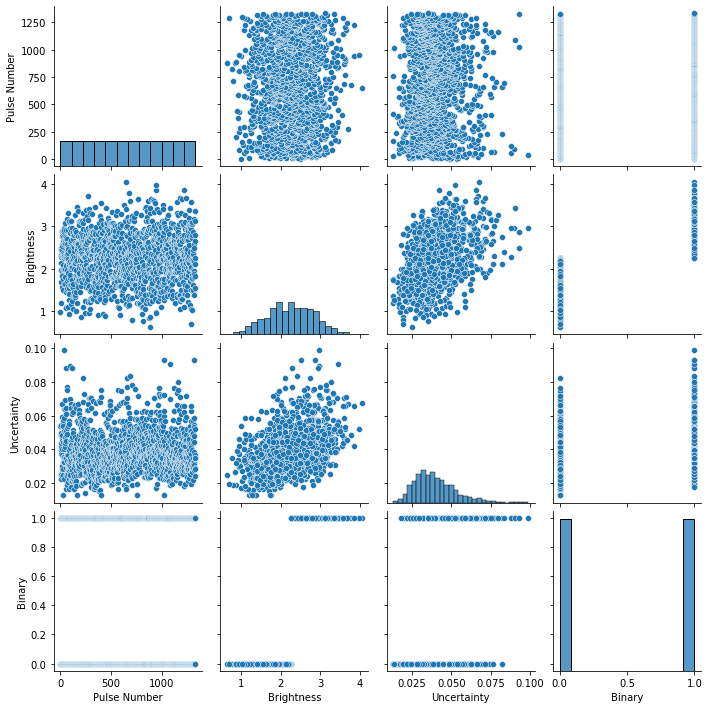

In [230]:
sns.pairplot(pulsar2)

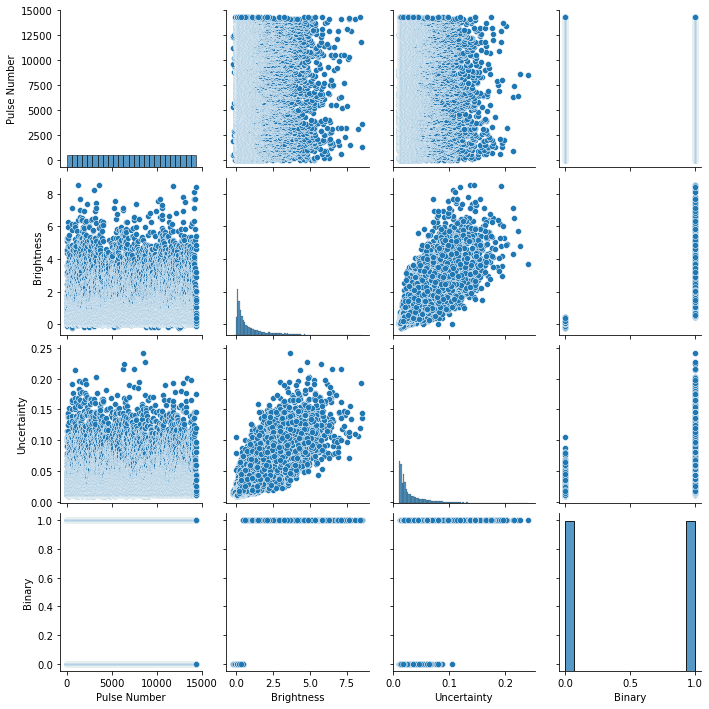

In [231]:
sns.pairplot(pulsar3)

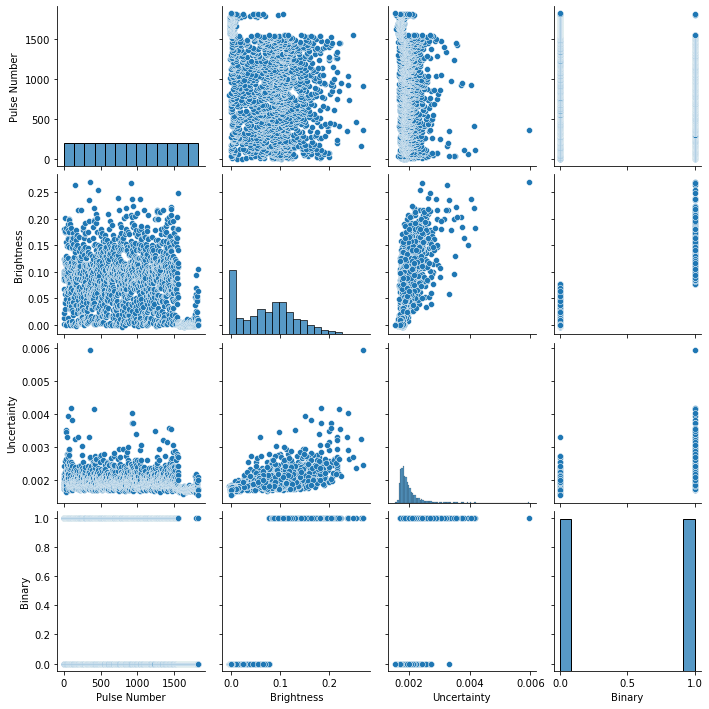

In [232]:
sns.pairplot(pulsar4)

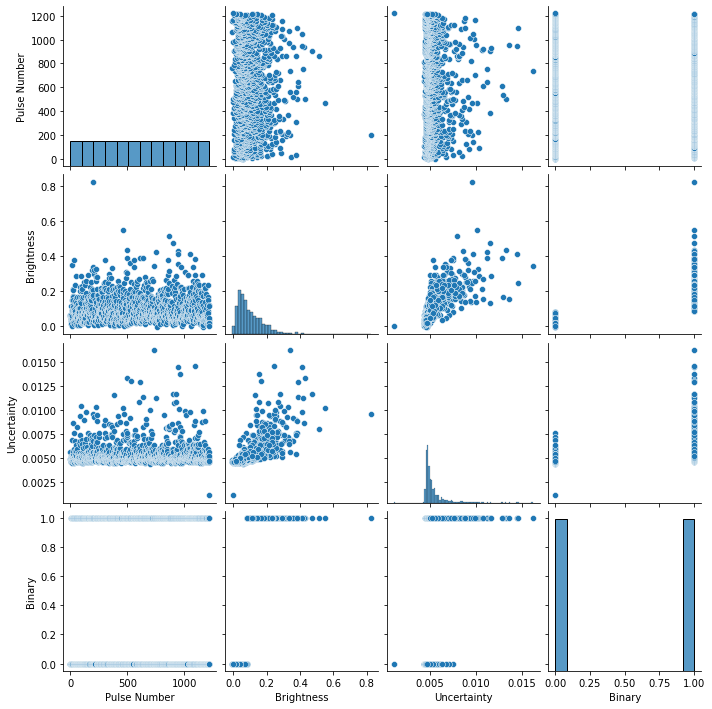

In [233]:
sns.pairplot(pulsar5)

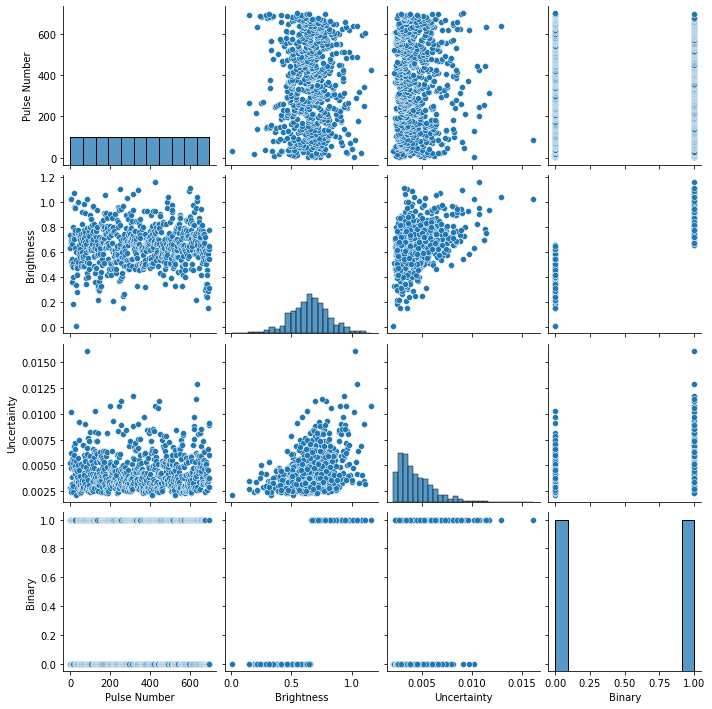

In [234]:
sns.pairplot(pulsar6)

In [235]:
pulsar1corr, _ = pearsonr(pulsar1.Brightness, pulsar1.Uncertainty)
print('Pulsar 1 --- Pearsons Corr: %.3f' % pulsar1corr)

Pulsar 1 --- Pearsons Corr: 0.291


In [236]:
pulsar2corr, _ = pearsonr(pulsar2.Brightness, pulsar2.Uncertainty)
print('Pulsar 2 --- Pearsons Corr: %.3f' % pulsar2corr)

Pulsar 2 --- Pearsons Corr: 0.435


In [237]:
pulsar3corr, _ = pearsonr(pulsar3.Brightness, pulsar3.Uncertainty)
print('Pulsar 3 --- Pearsons Corr: %.3f' % pulsar3corr)

Pulsar 3 --- Pearsons Corr: 0.843


In [238]:
pulsar4corr, _ = pearsonr(pulsar4.Brightness, pulsar4.Uncertainty)
print('Pulsar 4 --- Pearsons Corr: %.3f' % pulsar4corr)

Pulsar 4 --- Pearsons Corr: 0.604


In [239]:
pulsar5corr, _ = pearsonr(pulsar5.Brightness, pulsar5.Uncertainty)
print('Pulsar 5 --- Pearsons Corr: %.3f' % pulsar5corr)

Pulsar 5 --- Pearsons Corr: 0.709


In [240]:
pulsar6corr, _ = pearsonr(pulsar6.Brightness, pulsar6.Uncertainty)
print('Pulsar 6 --- Pearsons Corr: %.3f' % pulsar6corr)

Pulsar 6 --- Pearsons Corr: 0.404
